In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt

Data directories

In [2]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15

[LibSVM].........
*.
*
optimization finished, #iter = 10068
obj = -4034.761458, rho = -1.049440
nSV = 7961, nBSV = 6276
Total nSV = 7961


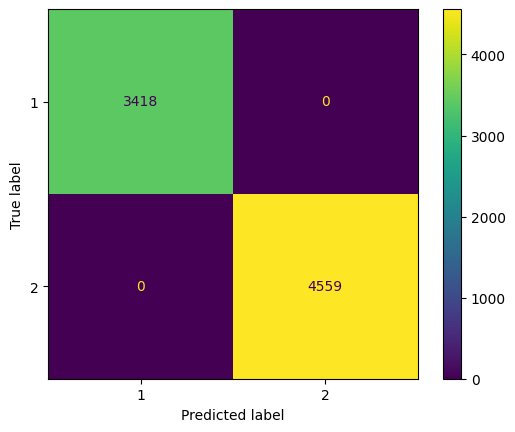

In [3]:

dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

model = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42, verbose=True)
model.fit(X=X_train, y=y_train)

test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

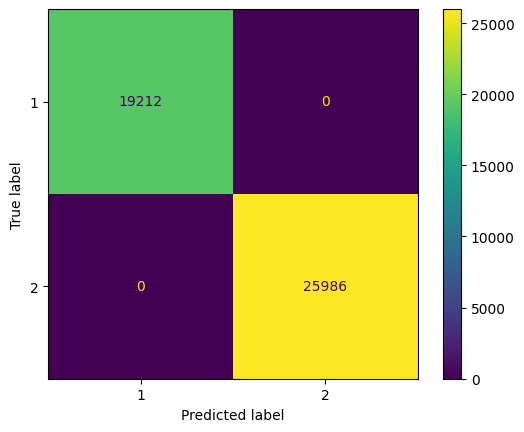

In [5]:
train_predictions = model.predict(X_train)
cm = confusion_matrix(y_train, train_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}